<a href="https://colab.research.google.com/github/DSPL-Project-Group-B10/Model-Deployment/blob/main/Model_Deployment_Test_CSV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Scalling

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
# Scaling gets the values into one range which improves the performance of the models
# Here Min Max scaling gets it into between 1 and 0.

df = pd.read_csv("/content/drive/MyDrive/Colab Data Files/Data Science Project Lifecycle/Project/processed_traincsv.csv")

from sklearn.preprocessing import MinMaxScaler

# Define the scaler
scaler = MinMaxScaler()

# Select the columns to scale
columns_to_scale = ['luxury_sales', 'fresh_sales', 'dry_sales']

# Apply Min-Max Scaling
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Display the scaled DataFrame
df.head()

#Save The Dataset to drive
df.to_csv("/content/drive/MyDrive/Colab Data Files/Data Science Project Lifecycle/Project/processed_traincsv.csv", index=False)


# Model 01

## Gradient Boosting

Gradient Boosting is highly effective for customer segmentation in KJ Marketing’s project as it captures complex, non-linear relationships in purchasing behavior across luxury, fresh, and dry sales. It handles categorical and numerical data well, making it ideal for classifying customers based on historical sales. The model’s feature importance analysis helps identify key purchasing drivers, aiding in personalized marketing strategies. Additionally, its robustness to outliers and high predictive accuracy ensure reliable segmentation, ultimately enhancing targeted promotions and customer engagement.

In [ ]:
# loading the dataset
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Data Files/Data Science Project Lifecycle/Project/processed_traincsv.csv")

In [ ]:
# Importing essential models from sklearn
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
# Define X and Y variables
x = df[['luxury_sales','fresh_sales','dry_sales','outlet_city']]
y = df['cluster_catgeory']

In [ ]:
#  splits the dataset (x, y) into training and testing sets, allocating 80% for training and 20% for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# initializing the Gradient boosting classifier
gbc_model = GradientBoostingClassifier(n_estimators=25, learning_rate=0.1, random_state=42)

In [ ]:
# Train the gradient boosting classifier using the train data
gbc_model.fit(x_train, y_train)

GradientBoostingClassifier(n_estimators=25, random_state=42)

In [ ]:
# predict using the model
y_pred = gbc_model.predict(x_test)

In [ ]:
# Evaluate the model
MSE = mean_squared_error(y_test, y_pred)
r2_= r2_score(y_test, y_pred)
Acs = accuracy_score(y_test, y_pred)

print(f"MSE:{MSE}")
print(f"R2:{r2_}")
print(f"Accuracy:{Acs}")

MSE:0.13509463212970738
R2:0.9612942580637611
Accuracy:0.977146179187391


In [ ]:
# Generate and print classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.99      0.99     37911
           2       0.99      1.00      0.99     30903
           3       0.87      0.85      0.86      9791
           4       0.99      0.99      0.99     34409
           5       0.82      0.84      0.83      7924
           6       1.00      0.99      0.99     33872

    accuracy                           0.98    154810
   macro avg       0.94      0.94      0.94    154810
weighted avg       0.98      0.98      0.98    154810



In [ ]:
# Show the frequency of each predicted cluster
cluster_counts = df['cluster_catgeory'].value_counts()
print("Cluster prediction frequencies:")
print(cluster_counts)

Cluster prediction frequencies:
cluster_catgeory
1    188961
4    172427
6    169206
2    155040
3     48890
5     39525
Name: count, dtype: int64


## Applying to Test Csv

In [ ]:
import pandas as pd

# Loading test csv
test_df = pd.read_csv('/content/drive/MyDrive/Colab Data Files/Data Science Project Lifecycle/Project/processed_test.csv')

# Using the same features used during training
X_test_final = test_df[['luxury_sales', 'fresh_sales', 'dry_sales', 'outlet_city']]


# Make predictions
test_predictions = gbc_model.predict(X_test_final)

# Ad predictions to the DataFrame
test_df['cluster_category'] = test_predictions

# Save the results if needed
test_df.to_csv("/content/drive/MyDrive/Colab Data Files/Data Science Project Lifecycle/Project/processed_test.csv", index=False)


In [ ]:
test_df.head()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,outlet_city_original,total_sales,luxury_sales_pct,cluster_category
0,33574,25,0.382541,0.228362,0.892316,batticaloa,18805.50,14.285714,1
1,10089,25,0.243379,0.153840,0.663203,batticaloa,13740.48,12.500000,1
2,38329,25,0.119357,0.054980,0.348515,batticaloa,7298.16,11.702128,4
3,11376,25,0.231969,0.134894,0.651052,batticaloa,13241.47,12.371134,4
4,12410,25,0.145934,0.075464,0.365816,batticaloa,7993.00,13.000000,1


In [ ]:
# Show the frequency of each predicted cluster
cluster_counts = test_df['cluster_category'].value_counts()
print("Cluster prediction frequencies:")
print(cluster_counts)

Cluster prediction frequencies:
cluster_category
4    12552
6     8798
2     8268
1     6551
5     2354
3     2226
Name: count, dtype: int64


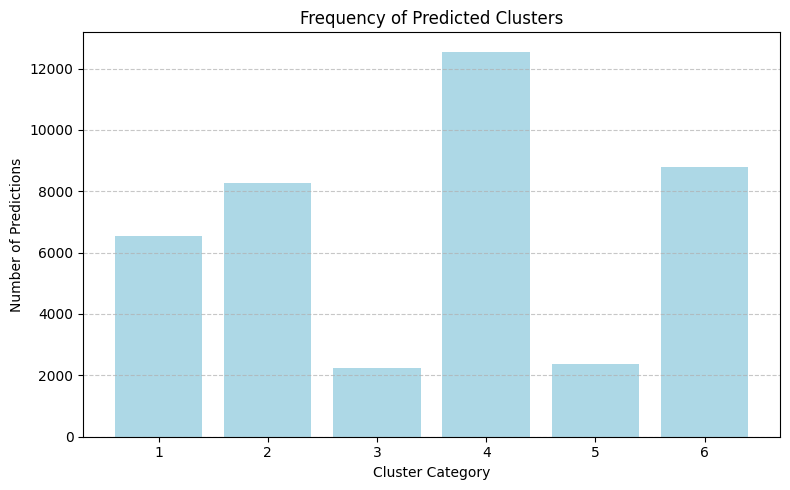

In [ ]:
import matplotlib.pyplot as plt

# frequency counts
cluster_counts = test_df['cluster_category'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(cluster_counts.index.astype(str), cluster_counts.values, color='lightblue')
plt.xlabel('Cluster Category')
plt.ylabel('Number of Predictions')
plt.title('Frequency of Predicted Clusters')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
